In [1]:
# import the packages that will be used in this project

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\anmol\Downloads\movies.csv')


In [13]:
# Now let's take a look at the data

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0


In [73]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%
yearcorrect - 0%


In [ ]:
df = df.dropna()
df

In [161]:
# Data Types for our columns

print(df.dtypes)

budget               float64
company               object
country               object
director              object
genre                 object
gross                float64
name                  object
rating                object
released              object
runtime                int64
score                float64
star                  object
votes                  int64
writer                object
year                   int64
grosstotal           float64
countrygrosstotal    float64
Year                  object
dtype: object


In [20]:
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')
df['runtime']=df['runtime'].astype('int64')
df['votes']=df['votes'].astype('int64')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100,2020


In [68]:
df=df.sort_values(by=['gross'], inplace=False, ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,386,5,0,2009,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162,2009
7445,388,5,0,2019,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181,2019
3045,4909,5,6,1997,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194,1997
6663,3643,5,0,2015,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138,2015
7244,389,5,0,2018,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149,2018


In [67]:
pd.set_option('display.max_rows',None)
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,4692,6,6,1980,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146,1980
1,3929,6,1,1980,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104,1980
2,3641,4,0,1980,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124,1980
3,204,4,4,1980,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88,1980
4,732,6,4,1980,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98,1980


In [65]:
df.drop_duplicates()
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,4692,6,6,1980,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146,1980
1,3929,6,1,1980,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104,1980
2,3641,4,0,1980,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124,1980
3,204,4,4,1980,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88,1980
4,732,6,4,1980,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98,1980


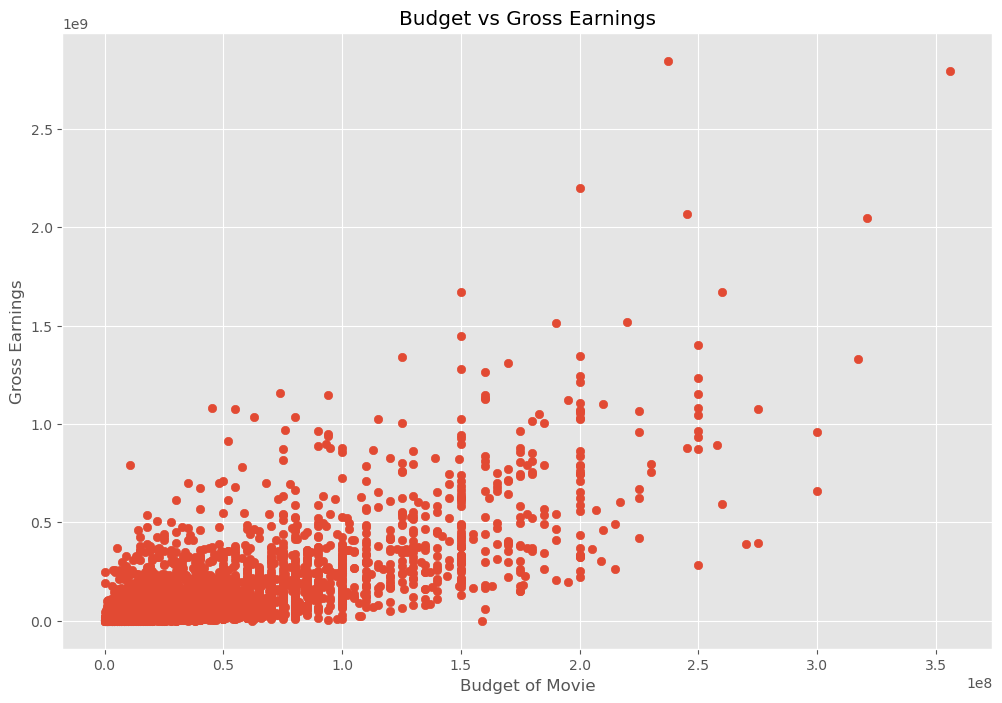

In [30]:
# Scatter plot bw budget & gross earnings for the movie

plt.scatter (x=df['budget'] , y=df['gross'])

plt.title('Budget vs Gross Earnings')
plt.ylabel('Gross Earnings')
plt.xlabel('Budget of Movie')

plt.show()

<Axes: xlabel='budget', ylabel='gross'>

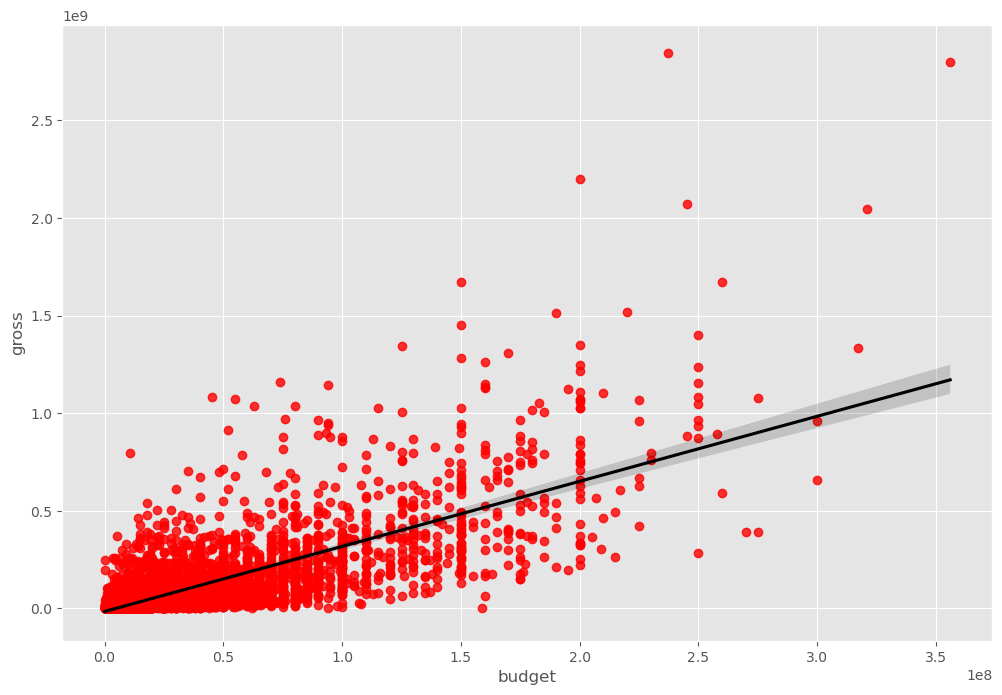

In [38]:

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "black"})


In [ ]:
# Let us start correlation

# We assume budget for a movie and the company to have high correlation. 

In [40]:
# Correlation Matrix between all numeric columns

df.corr(method='pearson', numeric_only=True)


# pearson is the default method used here ; others are kendall and spearman

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
yearcorrect,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


In [47]:
df.corr(method ='kendall', numeric_only=True)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.017023,0.005970,0.018614,-0.004104,0.005372,0.002477,0.010060,0.008769,-0.004706,-0.020738,0.014275,-0.000094,0.014124,0.009806,0.018488
rating,-0.017023,1.000000,0.137396,-0.015490,0.023547,0.067313,-0.008994,0.005950,0.001735,0.014913,-0.010547,-0.208389,-0.198863,-0.085192,0.085752,-0.011947
genre,0.005970,0.137396,1.000000,-0.058976,0.016088,0.045217,-0.133391,-0.005585,0.011042,0.002258,-0.012696,-0.275983,-0.194758,-0.058439,-0.027544,-0.055662
year,0.018614,-0.015490,-0.058976,1.000000,-0.001054,0.039389,0.296512,-0.025293,-0.018691,-0.022272,-0.057292,0.220833,0.239539,-0.005479,0.064824,0.991304
released,-0.004104,0.023547,0.016088,-0.001054,1.000000,0.028223,0.005205,0.001886,0.005302,0.010118,-0.016524,-0.000030,-0.016133,0.001654,0.011363,-0.003948
score,0.005372,0.067313,0.045217,0.039389,0.028223,1.000000,0.350185,0.009176,0.009058,0.004414,-0.100231,-0.006406,0.124943,0.009638,0.292254,0.043400
votes,0.002477,-0.008994,-0.133391,0.296512,0.005205,0.350185,1.000000,-0.001118,-0.001109,-0.007741,0.008577,0.346274,0.553625,0.107685,0.205344,0.293044
director,0.010060,0.005950,-0.005585,-0.025293,0.001886,0.009176,-0.001118,1.000000,0.196884,0.024300,-0.005956,-0.002787,-0.008633,-0.006430,0.002368,-0.024654
writer,0.008769,0.001735,0.011042,-0.018691,0.005302,0.009058,-0.001109,0.196884,1.000000,0.012601,0.015240,-0.014799,-0.009785,-0.002661,-0.021512,-0.018421
star,-0.004706,0.014913,0.002258,-0.022272,0.010118,0.004414,-0.007741,0.024300,0.012601,1.000000,-0.009260,-0.011155,-0.006465,0.007730,0.001750,-0.022511


In [48]:
df.corr(method='spearman', numeric_only=True)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.021980,0.008213,0.027766,-0.006341,0.007866,0.003615,0.014933,0.013023,-0.007027,-0.026431,0.021395,0.000038,0.021247,0.014849,0.027590
rating,-0.021980,1.000000,0.167778,-0.018206,0.031301,0.085237,-0.011871,0.007809,0.002124,0.019408,-0.011824,-0.267486,-0.256014,-0.108557,0.110151,-0.013863
genre,0.008213,0.167778,1.000000,-0.080105,0.022254,0.061615,-0.182682,-0.007466,0.015393,0.003449,-0.015225,-0.372729,-0.268314,-0.080808,-0.040119,-0.075633
year,0.027766,-0.018206,-0.080105,1.000000,-0.002404,0.057741,0.427623,-0.037591,-0.027646,-0.032760,-0.072272,0.312886,0.351045,-0.008798,0.095444,0.998694
released,-0.006341,0.031301,0.022254,-0.002404,1.000000,0.042145,0.006280,0.002797,0.007941,0.015392,-0.021012,-0.000495,-0.027079,0.002086,0.017166,-0.006623
score,0.007866,0.085237,0.061615,0.057741,0.042145,1.000000,0.495409,0.013366,0.013441,0.006735,-0.124916,-0.009971,0.183192,0.013694,0.412155,0.063674
votes,0.003615,-0.011871,-0.182682,0.427623,0.006280,0.495409,1.000000,-0.001819,-0.001398,-0.011716,0.010930,0.493461,0.745793,0.159554,0.300621,0.422988
director,0.014933,0.007809,-0.007466,-0.037591,0.002797,0.013366,-0.001819,1.000000,0.262486,0.036264,-0.007505,-0.003890,-0.012746,-0.009778,0.003444,-0.036677
writer,0.013023,0.002124,0.015393,-0.027646,0.007941,0.013441,-0.001398,0.262486,1.000000,0.018573,0.019264,-0.021810,-0.014593,-0.004120,-0.032161,-0.027295
star,-0.007027,0.019408,0.003449,-0.032760,0.015392,0.006735,-0.011716,0.036264,0.018573,1.000000,-0.011795,-0.016657,-0.009461,0.011481,0.002635,-0.033133


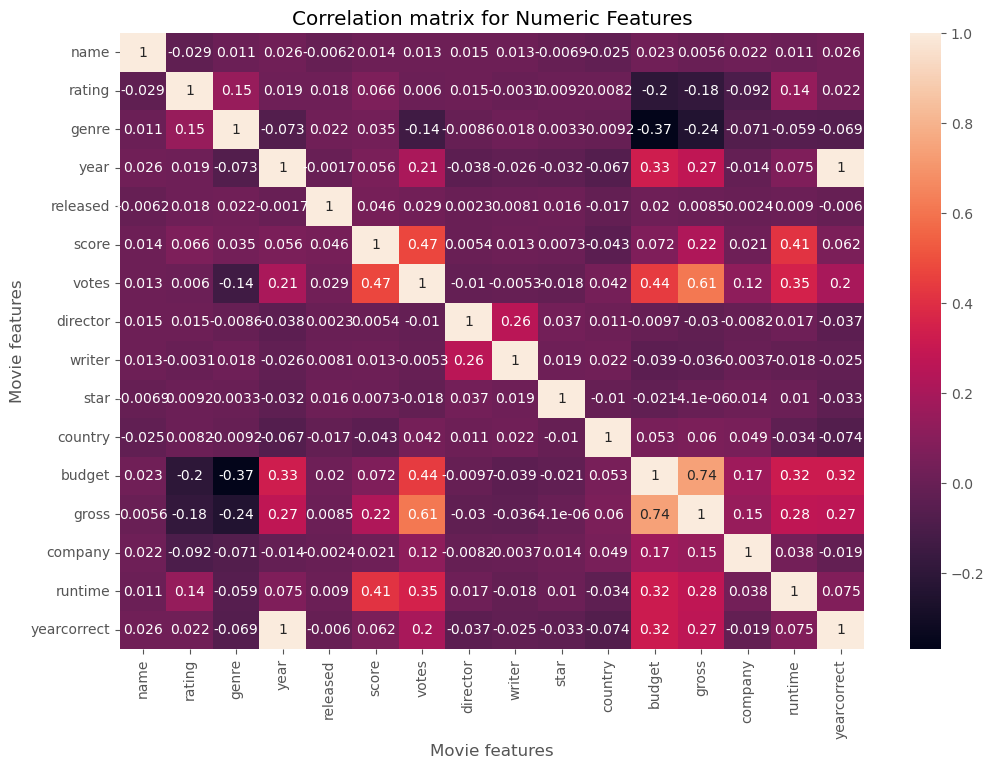

In [49]:
correlation_matrix = df.corr(method='pearson',numeric_only=True)

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [66]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,4692,6,6,1980,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146,1980
1,3929,6,1,1980,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104,1980
2,3641,4,0,1980,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124,1980
3,204,4,4,1980,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88,1980
4,732,6,4,1980,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98,1980


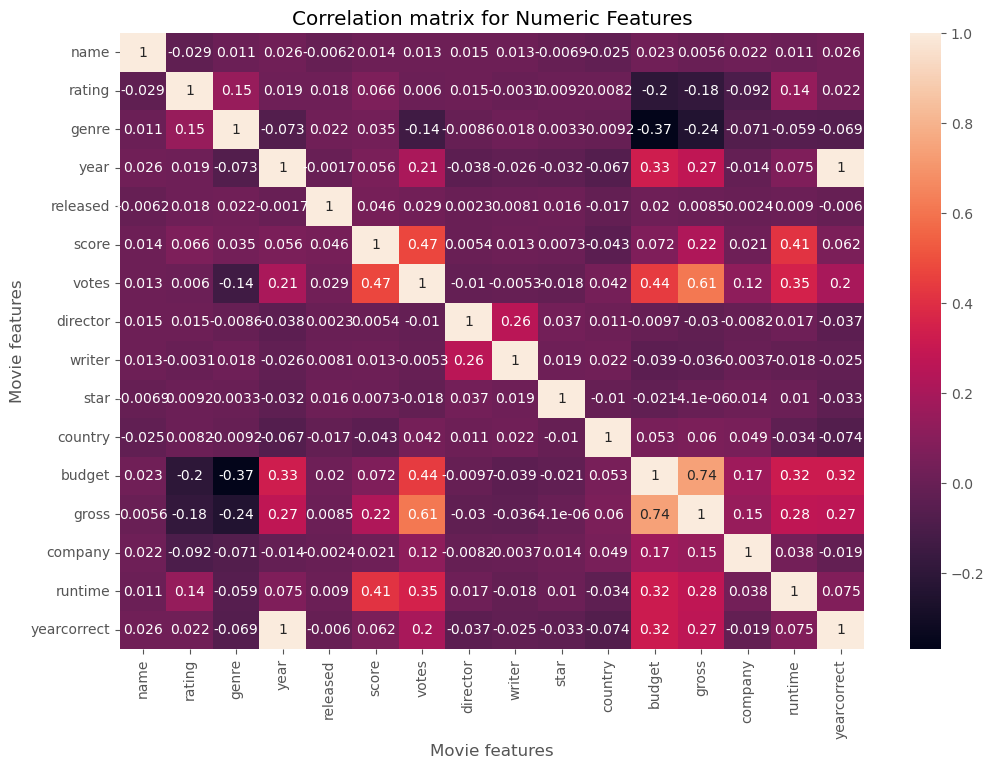

In [46]:
correlation_matrix = df_numerized.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [54]:
correlation_mat=df_numerized.corr()
corr_pairs=correlation_mat.unstack()
corr_pairs

name         name           1.000000
             rating        -0.029234
             genre          0.010996
             year           0.025542
             released      -0.006152
             score          0.014450
             votes          0.012615
             director       0.015246
             writer         0.012880
             star          -0.006882
             country       -0.025490
             budget         0.023392
             gross          0.005639
             company        0.021697
             runtime        0.010850
             yearcorrect    0.025542
rating       name          -0.029234
             rating         1.000000
             genre          0.147796
             year           0.019499
             released       0.018083
             score          0.065983
             votes          0.006031
             director       0.014656
             writer        -0.003149
             star           0.009196
             country        0.008230
 

In [55]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

genre        budget        -0.368523
budget       genre         -0.368523
gross        genre         -0.244101
genre        gross         -0.244101
rating       budget        -0.203946
budget       rating        -0.203946
rating       gross         -0.181906
gross        rating        -0.181906
votes        genre         -0.135990
genre        votes         -0.135990
company      rating        -0.092357
rating       company       -0.092357
country      yearcorrect   -0.073569
yearcorrect  country       -0.073569
year         genre         -0.073167
genre        year          -0.073167
             company       -0.071334
company      genre         -0.071334
genre        yearcorrect   -0.069147
yearcorrect  genre         -0.069147
year         country       -0.066748
country      year          -0.066748
genre        runtime       -0.059237
runtime      genre         -0.059237
score        country       -0.043051
country      score         -0.043051
writer       budget        -0.039466
b

In [56]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

gross        votes          0.614751
votes        gross          0.614751
gross        budget         0.740247
budget       gross          0.740247
year         yearcorrect    0.998726
yearcorrect  year           0.998726
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64


In [ ]:
# We find that votes and budget have the highest correlation with gross earnings for a movie

# Hence our assumption that big company houses produce better earnings for a movie seems to be false but the other assumption 
# for high budget holds true.